# JP Morgan Quant Challenge : ML
## Team Snick - Rishabh Singhal

In [0]:
!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive

!pip install -q pycocotools

In [2]:
fileId = '1QWVD3eFkqk1x1l0zfhbVxJzBpY0cHTg'

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileName = fileId + '.zip'
downloaded = drive.CreateFile({'id': fileId})
downloaded.GetContentFile(fileName)
ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

Extracted zip file 1QWVD3eFkqk1x1l0zfhbVxJzBpY0cHTjg.zip


In [3]:
!ls

adc.json  housing_test.csv  housing_train.csv  sample_data


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.decomposition import PCA 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import sklearn

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

## Data Import and Exploration

In [0]:
loc0 = (r'/content/housing_train.csv')
loc1 = (r'/content/housing_test.csv')
train = pd.read_csv(loc0, error_bad_lines=False)
test = pd.read_csv(loc1, error_bad_lines=False)

In [0]:
ww = train

In [0]:
train =ww

In [9]:
train.shape

(1219110, 15)

In [10]:
print(test.shape)
train.head()

(2066, 14)


,TID,Date,Property Type,OldvNew,Duration,AddressLine1,AddressLine2,Street,Locality,Town,Taluka,District,Postcode,Price,Price Category
0,1000,2018-01-01,F,N,L,9,NaN,XOUGBXCBUKB NBZX,NaN,ERLSYEL,ERLSYEL,ERLSYELXORKB,EL4 2BO,80.0,B
1,1001,2018-01-01,T,Y,F,02,NaN,OYYG ZUQ,NaN,NURFXMYLB,NURFXMYLB,GBLM,NB09 6VZ,218.5,A
2,1002,2018-01-01,D,N,F,32,NaN,XYNBKX CUKG UPBLWB,NaN,NUEPBKL,NUEPBKL OREEX,ZYKSBXMBKXORKB,ZK01 0XF,250.0,A
3,1003,2018-01-01,O,N,F,0,NaN,OUMOUZUQ SEYXB,NaN,EBRSBXMBK,EBRSBXMBK,EBRSBXMBK,EB1 3HI,6050.0,B
4,1004,2018-01-01,T,N,F,14,NaN,MBNBKURKB KYUF,NaN,CEQNYWMO,SRMQ YV CEQNYWMO,SRMQ YV CEQNYWMO,CE4 6WU,182.0,A


In [0]:
train.drop('AddressLine2', axis = 1, inplace = True)
test.drop('AddressLine2', axis = 1, inplace = True)

In [0]:
train.drop('Locality', axis = 1, inplace = True)
test.drop('Locality', axis = 1, inplace = True)

In [0]:
train.drop('TID', axis = 1, inplace = True)
test.drop('TID', axis = 1, inplace = True)

In [0]:
train.drop('AddressLine1', axis = 1, inplace = True)
test.drop('AddressLine1', axis = 1, inplace = True)

In [0]:
# Retaining the year component of the.
train['Year'] = train.apply(lambda row: row[0].split("-")[0] , axis = 1)
test['Year'] = test.apply(lambda row: row[0].split("-")[0] , axis = 1)
train['Month'] = train.apply(lambda row: row[0].split("-")[1] , axis = 1)
test['Month'] = test.apply(lambda row: row[0].split("-")[1] , axis = 1)
train['Day'] = train.apply(lambda row: row[0].split("-")[2] , axis = 1)
test['Day'] = test.apply(lambda row: row[0].split("-")[2] , axis = 1)

train.drop('Date', axis = 1, inplace = True)
test.drop('Date', axis = 1, inplace = True)

In [16]:
train.head(100)

,Property Type,OldvNew,Duration,Street,Town,Taluka,District,Postcode,Price,Price Category,Year,Month,Day
0,F,N,L,XOUGBXCBUKB NBZX,ERLSYEL,ERLSYEL,ERLSYELXORKB,EL4 2BO,80.000,B,2018,01,01
1,T,Y,F,OYYG ZUQ,NURFXMYLB,NURFXMYLB,GBLM,NB09 6VZ,218.500,A,2018,01,01
2,D,N,F,XYNBKX CUKG UPBLWB,NUEPBKL,NUEPBKL OREEX,ZYKSBXMBKXORKB,ZK01 0XF,250.000,A,2018,01,01
3,O,N,F,OUMOUZUQ SEYXB,EBRSBXMBK,EBRSBXMBK,EBRSBXMBK,EB1 3HI,6050.000,B,2018,01,01
4,T,N,F,MBNBKURKB KYUF,CEQNYWMO,SRMQ YV CEQNYWMO,SRMQ YV CEQNYWMO,CE4 6WU,182.000,A,2018,01,01
5,O,N,L,OWKXEBQ KYUF,BUXMEBRJO,BUXMEBRJO,OUNCXORKB,XY46 5VZ,30.000,B,2018,01,01
6,T,N,F,OQFB CUKG KYUF,OWEE,SRMQ YV GRLJXMYL WCYL OWEE,SRMQ YV GRLJXMYL WCYL OWEE,OW9 6UZ,130.000,A,2018,01,01
7,S,N,F,SUXMEBMYL UPBLWB,NRFFEBXHKYWJO,NRFFEBXHKYWJO,NRFFEBXHKYWJO,MX4 4TH,107.000,A,2018,01,01
8,F,N,L,NYKFBL KYUF,LBZCYKM,LBZCYKM,LBZCYKM,LC08 9BX,71.000,A,2018,01,01
9,F,N,L,TWLRCBK FKRPB,EYLFYL,ZULFXZYKMO,JKBUMBK EYLFYL,XZ02 0DX,153.750,A,2018,01,01


In [0]:
train['Postcode'].fillna(method='ffill', inplace = True)
train['Street'].fillna(method='ffill', inplace = True)

In [0]:
#train['Street1'] = train.apply(lambda row: str(row[4]).split(" ")[0] , axis = 1)
#test['Street1'] = test.apply(lambda row: str(row[4]).split(" ")[0] , axis = 1)

#train['Street2'] = train.apply(lambda row: str(row[4]).split(" ")[1] , axis = 1)
#test['Street2'] = test.apply(lambda row: str(row[4]).split(" ")[1] , axis = 1)

train.drop('Street', axis = 1, inplace = True)
test.drop('Street', axis = 1, inplace = True)

In [0]:
#train['Postcode1'] = train.apply(lambda row: str(row[6]).split(" ")[0] , axis = 1)
#test['Postcode1'] = test.apply(lambda row: str(row[6]).split(" ")[0] , axis = 1)

#train['Postcode2'] = train.apply(lambda row: str(row[6]).split(" ")[1] , axis = 1)
#test['Postcode2'] = test.apply(lambda row: str(row[6]).split(" ")[1] , axis = 1)



In [0]:
train.drop('Postcode', axis = 1, inplace = True)
test.drop('Postcode', axis = 1, inplace = True)

In [0]:
train.drop('Town', axis = 1, inplace = True)
test.drop('Town', axis = 1, inplace = True)

In [0]:
w = train

In [22]:
for col in train.columns:
    print(col,len(train[col].unique()))

Property Type 5
OldvNew 2
Duration 2
Taluka 353
District 113
Price 35511
Price Category 2
Year 2
Month 12
Day 31


In [0]:
train['OldvNew'] = train['OldvNew'].replace(['N', 'Y'], [0, 1])
train['Duration'] = train['Duration'].replace(['L' ,'F'], [0, 1])
train['Price Category'] = train['Price Category'].replace(['B', 'A'], [0, 1])

In [24]:
test.head(5)

,Property Type,OldvNew,Duration,Taluka,District,Price Category,Year,Month,Day
0,F,N,L,SBLMKUE HBFVYKFXORKB,SBLMKUE HBFVYKFXORKB,A,2019,04,01
1,S,N,F,SORSOBXMBK,ZBXM XWXXBA,A,2019,04,01
2,F,N,L,HRKNRLJOUN,ZBXM NRFEULFX,A,2019,04,01
3,F,Y,L,HUMO ULF LYKMO BUXM XYNBKXBM,HUMO ULF LYKMO BUXM XYNBKXBM,A,2019,04,01
4,F,N,L,SUNFBL,JKBUMBK EYLFYL,A,2019,04,01


In [26]:
train.corr()

,OldvNew,Duration,Price,Price Category
OldvNew,1.000000,-0.103963,-0.002143,0.014186
Duration,-0.103963,1.000000,0.006128,0.058110
Price,-0.002143,0.006128,1.000000,-0.070250
Price Category,0.014186,0.058110,-0.070250,1.000000


Text(0.5, 1.0, 'Correlation between different fearures')

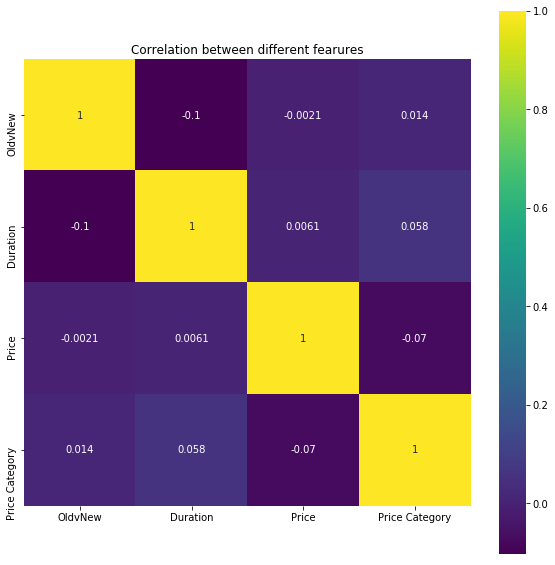

In [27]:
correlation = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [0]:
#train.drop(['TID','Date', 'AddressLine1', 'AddressLine2','Street','Locality','Town','Taluka','Postcode'], axis = 1, inplace = True)
#test.drop(['TID','Date', 'AddressLine1', 'AddressLine2','Street','Locality','Town','Taluka','Postcode'], axis = 1, inplace = True)

In [0]:
# Preparing data to be fed to a predictive model
train_Y = train['Price']
train_X = train.drop('Price', axis = 1)
test_X = test

In [30]:
train_X.head()

,Property Type,OldvNew,Duration,Taluka,District,Price Category,Year,Month,Day
0,F,0,0,ERLSYEL,ERLSYELXORKB,0,2018,01,01
1,T,1,1,NURFXMYLB,GBLM,1,2018,01,01
2,D,0,1,NUEPBKL OREEX,ZYKSBXMBKXORKB,1,2018,01,01
3,O,0,1,EBRSBXMBK,EBRSBXMBK,0,2018,01,01
4,T,0,1,SRMQ YV CEQNYWMO,SRMQ YV CEQNYWMO,1,2018,01,01


In [31]:
for col in train_X.columns:
    print(col,len(train_X[col].unique()))

Property Type 5
OldvNew 2
Duration 2
Taluka 353
District 113
Price Category 2
Year 2
Month 12
Day 31


## Principal component analysis

In [32]:
pca = PCA(.95)
x = pca.fit(pd.get_dummies(train_X)).transform(pd.get_dummies(train_X))
pca.explained_variance_

array([0.35684185, 0.32935777, 0.27093109, 0.24399886, 0.1574383 ,
       0.1294933 , 0.11537683, 0.1051843 , 0.08970356, 0.08692052,
       0.08477296, 0.08326522, 0.0796705 , 0.07680772, 0.07229865,
       0.07197965, 0.06346279, 0.05969652, 0.0557002 , 0.05033262,
       0.046167  , 0.0455136 , 0.03872039, 0.03691847, 0.0360662 ,
       0.0360186 , 0.03568328, 0.03522376, 0.03493071, 0.03452251,
       0.03404824, 0.03333377, 0.03270026, 0.03250149, 0.03227969,
       0.03205302, 0.03174799, 0.03105916, 0.03066384, 0.0304022 ,
       0.02999116, 0.02972713, 0.02847061, 0.02833799, 0.02799973,
       0.02761245, 0.0273036 , 0.02662099, 0.02630863, 0.02617895,
       0.02574494, 0.02355883, 0.02339446, 0.02323528, 0.02284605,
       0.02257168, 0.02231579, 0.02143957, 0.02114211, 0.02098851,
       0.02080747, 0.02024142, 0.01955112, 0.01912133, 0.01900039,
       0.01858378, 0.01815119, 0.01796879, 0.01790748, 0.01784251,
       0.01767639, 0.01752621, 0.01718294, 0.01657219, 0.01601

In [0]:
h = x

In [0]:
#Due to time constraint I am reducing the components to 16 as they contribute to the most of the variance with minimum dimensions 

In [44]:
pca2 = PCA(n_components=16, whiten='True')
x = pca2.fit(pd.get_dummies(train_X)).transform(pd.get_dummies(train_X))
pca.explained_variance_

array([0.35684185, 0.32935777, 0.27093109, 0.24399886, 0.1574383 ,
       0.1294933 , 0.11537683, 0.1051843 , 0.08970356, 0.08692052,
       0.08477296, 0.08326522, 0.0796705 , 0.07680772, 0.07229865,
       0.07197965, 0.06346279, 0.05969652, 0.0557002 , 0.05033262,
       0.046167  , 0.0455136 , 0.03872039, 0.03691847, 0.0360662 ,
       0.0360186 , 0.03568328, 0.03522376, 0.03493071, 0.03452251,
       0.03404824, 0.03333377, 0.03270026, 0.03250149, 0.03227969,
       0.03205302, 0.03174799, 0.03105916, 0.03066384, 0.0304022 ,
       0.02999116, 0.02972713, 0.02847061, 0.02833799, 0.02799973,
       0.02761245, 0.0273036 , 0.02662099, 0.02630863, 0.02617895,
       0.02574494, 0.02355883, 0.02339446, 0.02323528, 0.02284605,
       0.02257168, 0.02231579, 0.02143957, 0.02114211, 0.02098851,
       0.02080747, 0.02024142, 0.01955112, 0.01912133, 0.01900039,
       0.01858378, 0.01815119, 0.01796879, 0.01790748, 0.01784251,
       0.01767639, 0.01752621, 0.01718294, 0.01657219, 0.01601

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Model Training and Predictions

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, train_Y, test_size = 0.2, 
                                                           random_state = 42)
#CVtrain_X, CVtest_X = pd.get_dummies(CVtrain_X), pd.get_dummies(CVtest_X)

In [0]:
def evaluate_models(number_of_est, maximum_depth, models, train_X, test_X):    
    '''Function to evaluate the performance of a tree based model (based on R2 score), over a grid of
        number of estimators and maximum depth. Function takes in choice of model, array of n_estimators, 
        array of max_depth and training and testing sets'''
    for model_choice in models:
        for n_est in number_of_est:
            for max_d in maximum_depth:
                model = model_choice(n_estimators=n_est, max_depth=max_d, random_state = 2)
                model.fit(X_train, y_train)
                CVpred = model.predict(X_test)
                mae = mean_absolute_error(y_test, CVpred)
    
                r2 = r2_score(y_test, CVpred)
                print(model_choice,',Estimators:',n_est,',Max_Depth:',max_d,',R2:', r2,',MAE:',mae)

In [53]:
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

0.019308278270736112

In [0]:
tttt = model.predict(X_test)

In [51]:
X_train.shape

(975288, 16)

In [52]:
X_test.shape

(243822, 16)

In [0]:
models = [RandomForestRegressor, GradientBoostingRegressor]
number_of_est = [20, 30, 40, 50, 60]
#number_of_est = [250, 80, 50, 60]
#maximum_depth = [8, 10, 15]
maximum_depth = [5, 10, 15, 20, 25]
evaluate_models(number_of_est, maximum_depth, models, X_train, y_train)

#### Code for ensembling of the above trained model 

In [0]:
#from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
#eclf1 = VotingClassifier(estimators=[('lr', ada), ('rf', rf), ('gnb', gb),('svc',svc)], voting='hard')
#eclf1 = eclf1.fit(X_train, y_train)
#eclf1.score(X_test, y_test)